Plots for matching lambda

['/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/std_matches_Sift.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/mean_matches_Harris.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/nb_matches_Harris.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/mean_matches_Sift.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/std_matches_Shi_tomasi.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/nb_matches_Sift.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/nb_matches_Shi_tomasi.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/std_matches_Harris.npy', '/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/mean_matches_Shi_tomasi.npy']


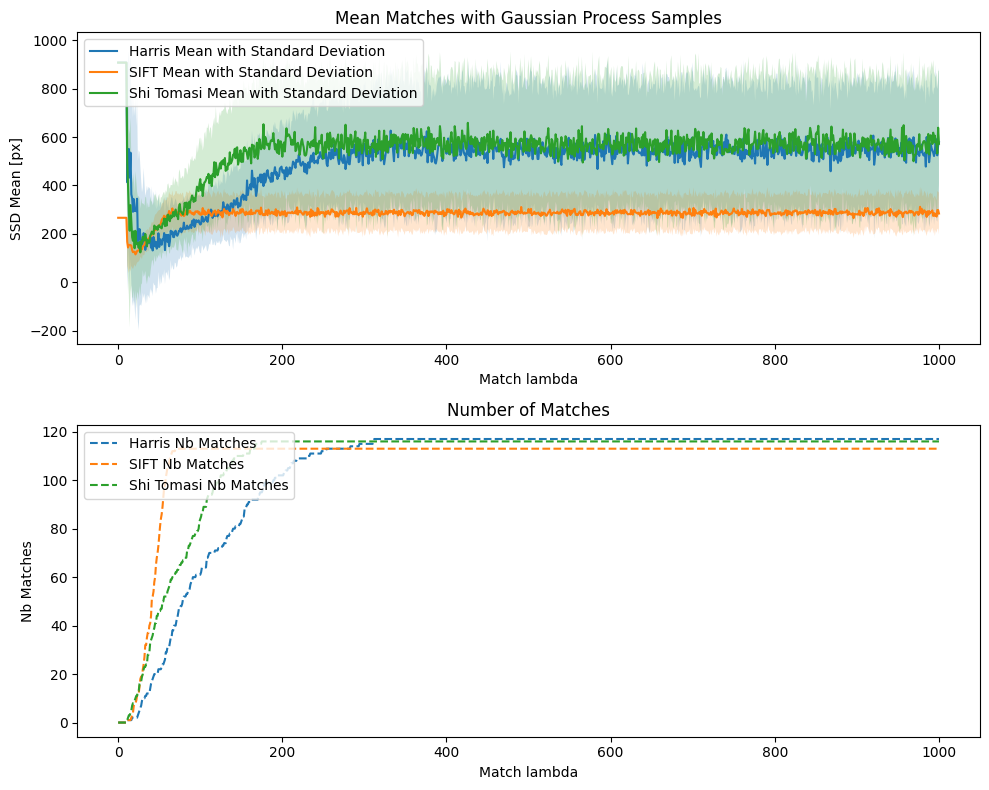

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats import norm

# Get list of all .npy files in the folder
file_list = glob.glob('/Users/swissjab/Desktop/uzh_vision/VO_miniproject/Code/plots/*.npy')
print(file_list)

# Initialize dictionaries to store mean and std data
mean_data = {}
std_data = {}
nb_matches_data = {}

# Loop through the files and store mean, std, and nb_matches data
for file in file_list:
    data = np.load(file)
    if 'mean' in file:
        if 'Harris' in file:
            mean_data['Harris'] = data
        elif 'Sift' in file:
            mean_data['SIFT'] = data
        elif 'Shi_tomasi' in file:
            mean_data['Shi Tomasi'] = data
    elif 'std' in file:
        if 'Harris' in file:
            std_data['Harris'] = data
        elif 'Sift' in file:
            std_data['SIFT'] = data
        elif 'Shi_tomasi' in file:
            std_data['Shi Tomasi'] = data
    elif 'nb_matches' in file:
        if 'Harris' in file:
            nb_matches_data['Harris'] = data
        elif 'Sift' in file:
            nb_matches_data['SIFT'] = data
        elif 'Shi_tomasi' in file:
            nb_matches_data['Shi Tomasi'] = data

# Initialize a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot mean values with Gaussian process samples on the first subplot
x = range(len(next(iter(mean_data.values()))))
for label in mean_data:
    mean = mean_data[label]
    std = std_data[label]
    samples = [norm.rvs(loc=mean[i], scale=std[i], size=100) for i in range(len(mean))]
    samples_mean = np.mean(samples, axis=1)
    samples_std = np.std(samples, axis=1)
    ax1.plot(x, samples_mean, label=f'{label} Mean with Standard Deviation')
    ax1.fill_between(x, samples_mean - samples_std, samples_mean + samples_std, alpha=0.2)

# Add legend and labels for the first subplot
ax1.legend(loc='upper left')
ax1.set_xlabel('Match lambda')
ax1.set_ylabel('SSD Mean [px]')
ax1.set_title('Mean Matches with Gaussian Process Samples')

# Plot nb_matches data on the second subplot
for label in nb_matches_data:
    nb_matches = nb_matches_data[label]
    ax2.plot(x, nb_matches, linestyle='--', label=f'{label} Nb Matches')

# Add legend and labels for the second subplot
ax2.legend(loc='upper left')
ax2.set_xlabel('Match lambda')
ax2.set_ylabel('Nb Matches')
ax2.set_title('Number of Matches')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
